Principal Component Analysis (PCA) --

PCA is called dimensionally reduction technique as it can help us reduce dimensions.

It is a process of figuring out the most important features or principal components that has the most impact on the target variable.

Process --

Draw the scatter plot between two features if it is straight and find no realtion then the features are not related to each other but if it is linear and have a realtion between them than these will be called principal components.

This hepls us in reducing the columns which helps in easy computation and fast results.

In [1]:
import pandas as pd 
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()

In [3]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

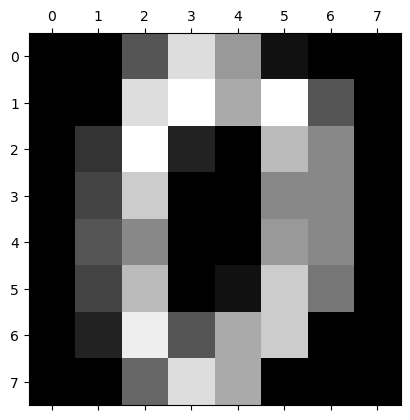

In [6]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [7]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [11]:
x = df
y = dataset.target

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=30)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9722222222222222

Now using PCA --

In [15]:
from sklearn.decomposition import PCA
pca = PCA(0.95) ## THIS MEANS RETAIN 95% OF USEFUL FEATURES AND THEN CREATE NEW DIMENSION.

In [17]:
x.shape

(1797, 64)

In [18]:
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 29)

We can see that in x there were 64 columns and now in x_pca there are 29 columns.

These 29 columns are important columns.

Now training the model by using PCA data --

In which we have only useful columns.

In [23]:
x_train_pca,x_test_pca,y_train,y_test= train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [24]:
model = LogisticRegression()
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test) 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222

Now importing another dataset for practice--

In [25]:
import pandas as pd

In [37]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [42]:
df.Sex = le.fit_transform(df.Sex)
df.ChestPainType = le.fit_transform(df.ChestPainType)
df.RestingECG= le.fit_transform(df.RestingECG)
df.ExerciseAngina= le.fit_transform(df.ExerciseAngina)
df.ST_Slope= le.fit_transform(df.ST_Slope)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [44]:
x = df.drop('HeartDisease',axis='columns')
y = df.HeartDisease
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=30)

In [47]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [48]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8369565217391305

In [49]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x)

In [51]:
x_train_pca,x_test_pca,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [52]:
model_rf.fit(x_train_pca,y_train)
model_rf.score(x_test_pca,y_test)

0.6956521739130435